# FLIGHT BOOKING PREDICTION

IMPORTING LIBRARIES

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTING THE DATASET

In [2]:
df = pd.read_csv("Flight_Booking.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


PERFORMING EDA PROCESS

In [3]:
# dropping column 'Unnamed'
df = df.drop(columns = ["Unnamed: 0"])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.shape

(300153, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [6]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [7]:
#checking out missing values
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

DATA VISUALIZATION

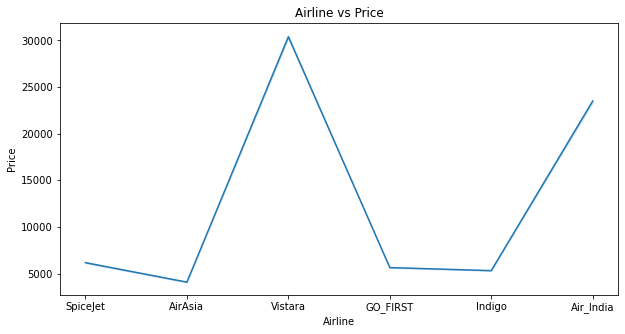

In [8]:
plt.figure(figsize = (10,5))
sns.lineplot(x = df["airline"], y = df["price"])
plt.title("Airline vs Price")
plt.xlabel("Airline")
plt.ylabel("Price");
#this graph is showing that there is differnces in the flight ticket prices according to different airlines

<AxesSubplot:xlabel='airline', ylabel='price'>

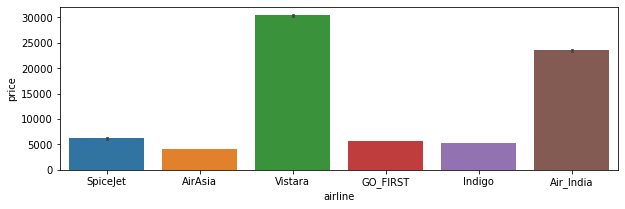

In [9]:
plt.figure(figsize = (10,3))
sns.barplot(x = "airline", y = "price", data = df)

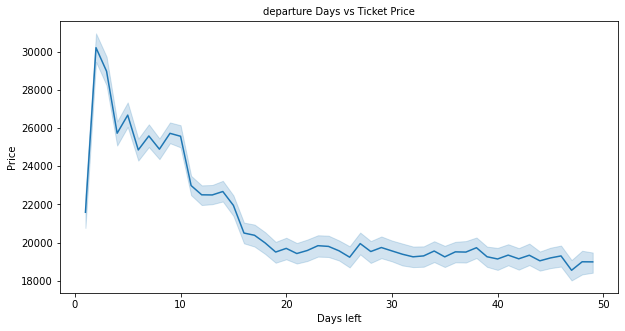

In [10]:
# graph to show the changes in the prices as the days of departure are decreasing
plt.figure(figsize = (10,5))
sns.lineplot(x = df["days_left"], y = df["price"])
plt.title("departure Days vs Ticket Price", fontsize = 10)
plt.xlabel("Days left")
plt.ylabel("Price");

Text(0, 0.5, 'Price')

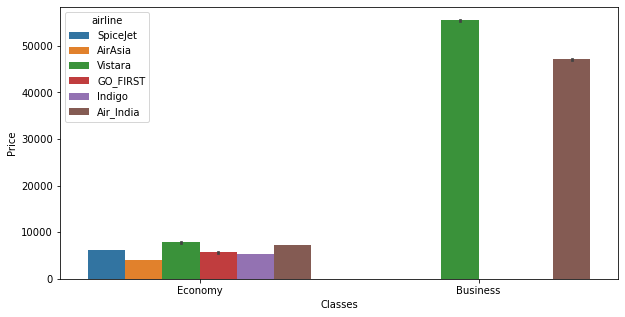

In [11]:
# Now getting the difference btween the range of prices between different flights of different classes.
plt.figure(figsize = (10,5))
sns.barplot(x = "class", y = "price", data = df, hue = "airline")
plt.xlabel("Classes")
plt.ylabel("Price")

# only two classes are there

<AxesSubplot:xlabel='days_left', ylabel='price'>

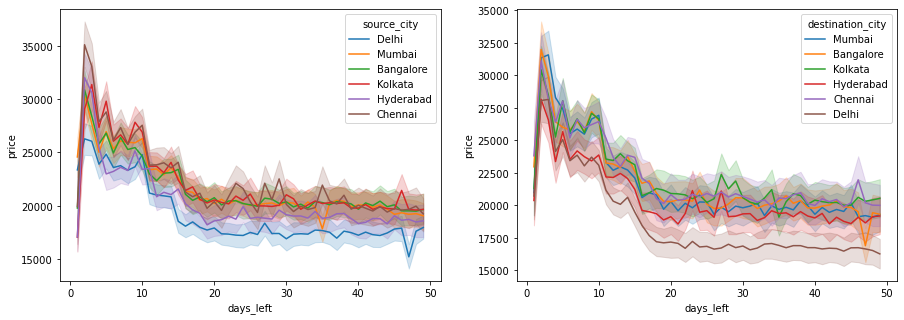

In [12]:
fig,ax = plt.subplots(1,2, figsize = (15,5))
sns.lineplot(x =df["days_left"], y = df["price"], hue = df["source_city"], ax = ax[0] )
sns.lineplot(x =df["days_left"], y = df["price"], hue = df["destination_city"], ax = ax[1])


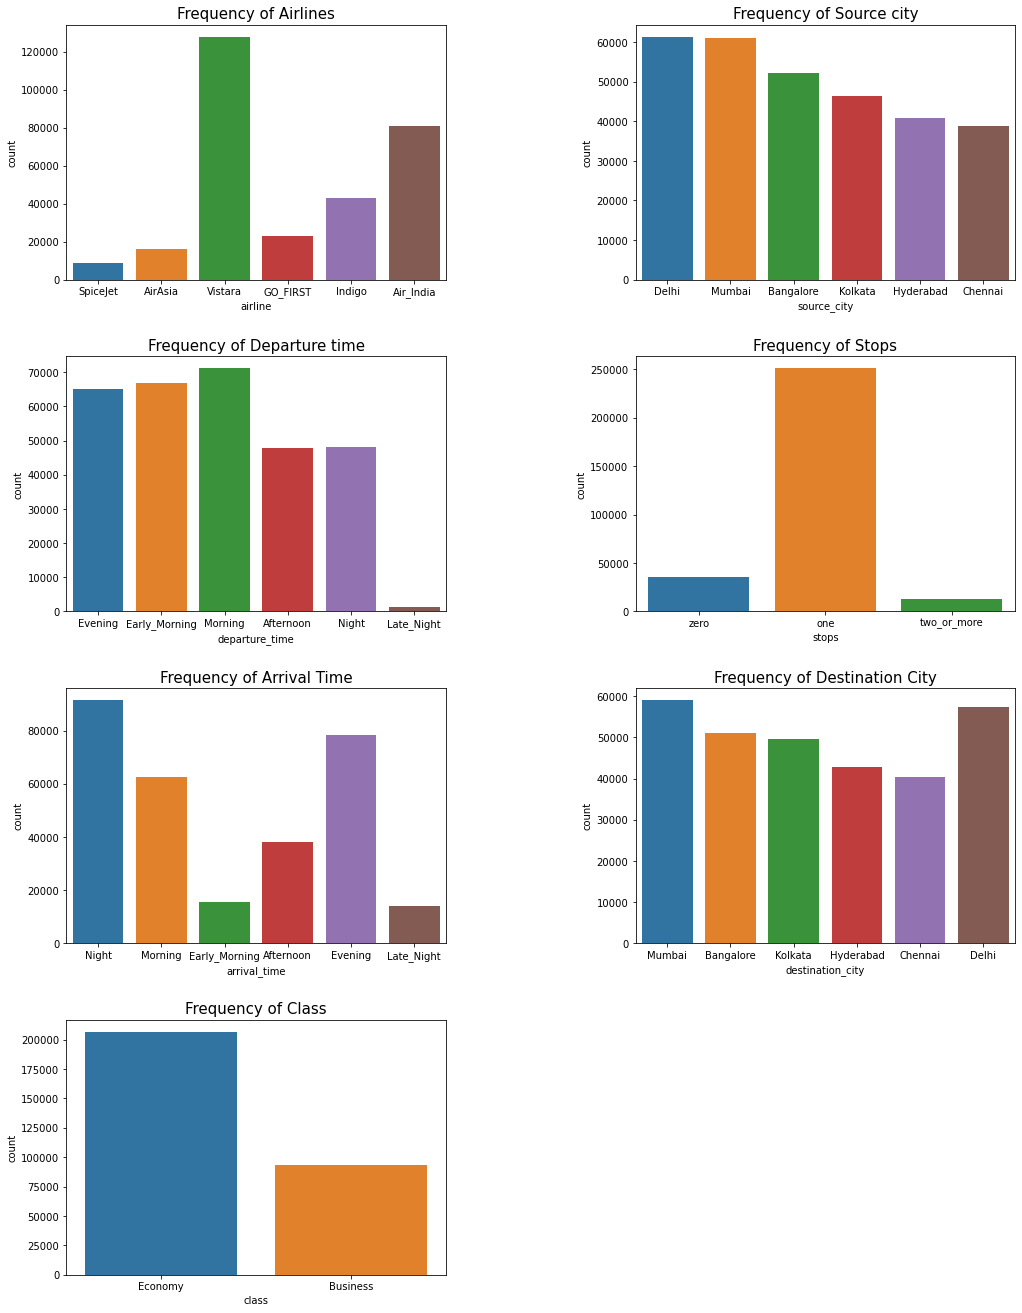

In [13]:
plt.figure(figsize=(17,23))

plt.subplot(4,2,1)
sns.countplot(x = df["airline"])
plt.title("Frequency of Airlines", fontsize = 15)

plt.subplot(4,2,2)
sns.countplot(x = df["source_city"])
plt.title("Frequency of Source city", fontsize = 15)

plt.subplot(4,2,3)
sns.countplot(x = df["departure_time"])
plt.title("Frequency of Departure time", fontsize = 15)

plt.subplot(4,2,4)
sns.countplot(x = df["stops"])
plt.title("Frequency of Stops", fontsize = 15)

plt.subplot(4,2,5)
sns.countplot(x = df["arrival_time"])
plt.title("Frequency of Arrival Time", fontsize = 15)

plt.subplot(4,2,6)
sns.countplot(x = df["destination_city"])
plt.title("Frequency of Destination City", fontsize = 15)

plt.subplot(4,2,7)
sns.countplot(x = df["class"])
plt.title("Frequency of Class", fontsize = 15)
plt.subplots_adjust(hspace=0.3, wspace=0.5)

Insights of above plots
- 'Vistara' airlines have the highest number of bookings.
- Most of the airlines have atleast one stop in between.
- Number of flights departing in morning are more than any other departure time whereas the arriving time is mostly at night and evening. 
- Econony class has the maximum number of flight bookings.

In [14]:
from sklearn.preprocessinumberg import LabelEncoder
label = LabelEncoder()

df["airline"] = label.fit_transform(df["airline"])
df["departure_time"] = label.fit_transform(df["departure_time"])
df["arrival_time"] = label.fit_transform(df["arrival_time"])
df["destination_city"] = label.fit_transform(df["destination_city"])
df["source_city"] = label.fit_transform(df["source_city"])
df["stops"] = label.fit_transform(df["stops"])
df["class"] = label.fit_transform(df["class"])


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


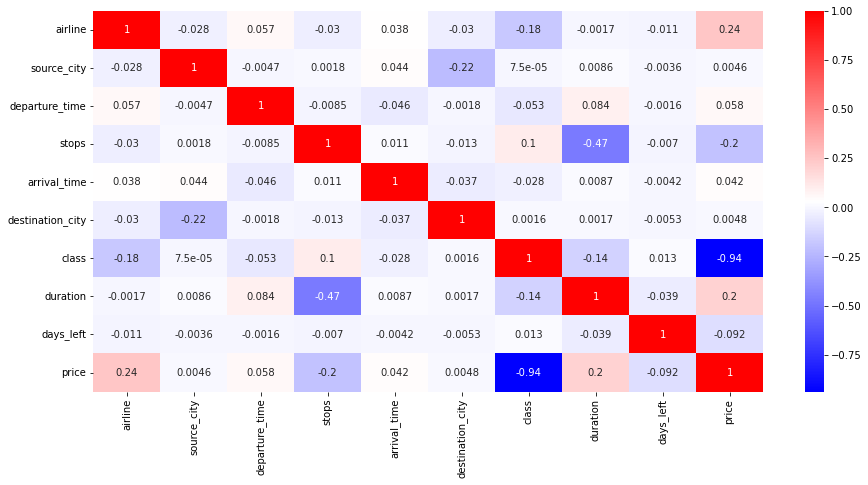

In [16]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot = True, cmap = "bwr" )
plt.show()

# FEATURE SELECTION


In [17]:
# USING VARIANCE INFLATION FACTOR (VIF)

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []
for col in df.columns:
    if((df[col].dtype != 'object')&(col != 'price')):
        col_list.append(col)

In [19]:
x = df[col_list]
x

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,2,2,2,5,5,1,2.17,1
1,4,2,1,2,4,5,1,2.33,1
2,0,2,1,2,1,5,1,2.17,1
3,5,2,4,2,0,5,1,2.25,1
4,5,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49
300149,5,1,0,0,5,3,0,10.42,49
300150,5,1,1,0,5,3,0,13.83,49
300151,5,1,1,0,2,3,0,10.00,49


In [20]:
vif = pd.DataFrame()
vif['feature'] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]


In [21]:
print(vif)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [22]:
x

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,2,2,2,5,5,1,2.17,1
1,4,2,1,2,4,5,1,2.33,1
2,0,2,1,2,1,5,1,2.17,1
3,5,2,4,2,0,5,1,2.25,1
4,5,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49
300149,5,1,0,0,5,3,0,10.42,49
300150,5,1,1,0,5,3,0,13.83,49
300151,5,1,1,0,2,3,0,10.00,49


In [23]:
a = df.drop(columns = ['price'])
a

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,SG-8709,2,2,2,5,5,1,2.17,1
1,4,SG-8157,2,1,2,4,5,1,2.33,1
2,0,I5-764,2,1,2,1,5,1,2.17,1
3,5,UK-995,2,4,2,0,5,1,2.25,1
4,5,UK-963,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...,...
300148,5,UK-822,1,4,0,2,3,0,10.08,49
300149,5,UK-826,1,0,0,5,3,0,10.42,49
300150,5,UK-832,1,1,0,5,3,0,13.83,49
300151,5,UK-828,1,1,0,2,3,0,10.00,49


# SPLITTING THE DATA

In [24]:
#a = df.drop(columns = ['price'])
a = x
b = df["price"]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(a, b , test_size  = 0.2, random_state = 42)

In [25]:
a

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,2,2,2,5,5,1,2.17,1
1,4,2,1,2,4,5,1,2.33,1
2,0,2,1,2,1,5,1,2.17,1
3,5,2,4,2,0,5,1,2.25,1
4,5,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49
300149,5,1,0,0,5,3,0,10.42,49
300150,5,1,1,0,5,3,0,13.83,49
300151,5,1,1,0,2,3,0,10.00,49


STANDARDIZING 

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

APPLYING LINEAR REGRESSION MODEL

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred1 = model.predict(X_test)

In [30]:
error_pred = pd.DataFrame(columns ={'Actual data','Predicted data' })

In [31]:
error_pred['Actual data']= y_test
error_pred['Predicted data']= y_pred1
error_pred.head()

,actual data,Predicted data,Actual data
27131,NaN,4585.880510,7366
266857,NaN,52842.077073,64831
141228,NaN,7877.980184,6195
288329,NaN,56120.138579,60160
97334,NaN,6663.204177,6578


CHECKING HOW ACCURATE THE MODEL IS:

In [32]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [33]:
#R2 indicates the proportion of data points which lie within the line created by the regression 
#equation. A higher value of R2 is desirable as it indicates better results.
r2_score(y_test,y_pred1)

0.904554350718816

In [34]:
mae1 = mean_absolute_error(y_test, y_pred1)
print(mae1)
MAPE1 = mean_absolute_percentage_error(y_test,y_pred1)
print(MAPE1)
from sklearn import metrics
mse1 = metrics.mean_squared_error(y_test, y_pred1)
print(mse1)
root_mean_square_error1 = np.sqrt(mean_squared_error(y_test, y_pred1))
print("RMSE1:", root_mean_square_error1 )

4624.9948680168745
0.4353581089683267
49200540.293722
RMSE: 7014.309680483319


C:\Users\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


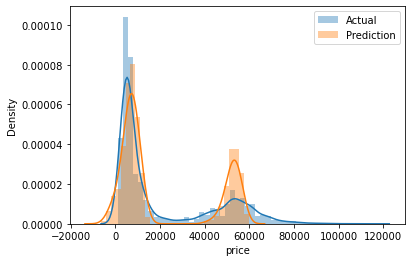

In [35]:
sns.distplot(y_test, label = "Actual")
sns.distplot(y_pred1, label = "Prediction")
plt.legend()

APPLYING DECISION TREE MODEL

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
clf = DecisionTreeRegressor()

In [38]:
clf.fit(X_train, y_train)

DecisionTreeRegressor()

In [39]:
y_pred2 = clf.predict(X_test)
print(X_test)
print(y_pred2)

[[-1.15009744 -0.33003243  0.90291402 ...  0.67246146  1.04760002
   1.03096515]
 [ 1.03227296  0.81160707  0.90291402 ... -1.48707407 -0.33126787
   1.17836796]
 [ 1.03227296  0.81160707  0.90291402 ...  0.67246146 -0.23813869
   1.10466656]
 ...
 [-1.15009744  0.24078732 -0.80832578 ...  0.67246146  0.18997755
   0.14654831]
 [-0.05891224  0.24078732 -0.23791252 ...  0.67246146 -1.41962831
   1.03096515]
 [ 1.03227296 -0.90085218  1.47332728 ... -1.48707407  1.83572309
  -1.69598679]]
[ 7366. 72783.  6195. ...  6314.  5082. 70049.]


SCORES

In [40]:
r22 = r2_score(y_test, y_pred2)
print(r22)

0.9755799924842121


In [41]:
mae2 = mean_absolute_error(y_test, y_pred2)
print("MAE2 Score:", mae2)
mape2 = mean_absolute_percentage_error(y_test, y_pred2)
print("MAPE2 Score:" ,mape2)

MAE2 Score: 1172.5982631196107
MAPE2 Score: 0.07367950167186328


In [42]:
from sklearn.metrics import mean_squared_error
print("MSE2:", mean_squared_error(y_test, y_pred2))
root_mean_square_error2 = np.sqrt(mean_squared_error(y_test, y_pred2))
print("RMSE2:", root_mean_square_error2 )

MSE2: 12588080.994807314
RMSE2: 3547.968572973458


APPLYING RANDOM FOREST MODEL

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [44]:
rf_pred = rf.predict(X_test)

In [45]:
r23 = r2_score(y_test, rf_pred)
print("R2 Score3:" ,r23)
mae3 = mean_absolute_error(y_test, rf_pred)
print("MAE Score3:", mae3)
mape3 = mean_absolute_percentage_error(y_test, rf_pred)
print("MAPE Score3:" ,mape3)
print("MSE3:", mean_squared_error(y_test, rf_pred))
root_mean_square_error3 = np.sqrt(mean_squared_error(y_test, rf_pred))
print("RMSE3:", root_mean_square_error3 )
# lower the rmse and mape the better the model.

R2 Score3: 0.98497022521525
MAE Score3: 1088.9661864286124
MAPE Score3: 0.07039882328342371
MSE3: 7747582.477271032
RMSE3: 2783.447947648928


so the best model for this dataset is Rndom forest as we can see that random forest model have the 
lowest "Mape" and "rmse" score.